In [74]:
#Read the dataset
import pandas as pd
df = pd.read_csv('autoscout24-germany-dataset.csv')
df

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00,2021


In [75]:
#View the statistics of the numerical data
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,mileage,price,hp,year
count,46405.00,46405.00,46376.00,46405.00
mean,71177.86,16572.34,132.99,2016.01
std,62625.31,19304.70,75.45,3.16
min,0.00,1100.00,1.00,2011.00
25%,19800.00,7490.00,86.00,2013.00
50%,60000.00,10999.00,116.00,2016.00
75%,105000.00,19490.00,150.00,2019.00
max,1111111.00,1199900.00,850.00,2021.00


In [76]:
#Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [77]:
#Check for duplicate values in the dataset
duplicate_values_count = df.duplicated().sum()
duplicate_values_count

2140

In [78]:
#Cleaning the data

df['model'] = df['model'].fillna('Unknown') #Replace missing model values with 'Unknown'
df['gear'] = df['gear'].fillna(df['gear'].mode()[0]) #Replace missing gear values with the mode value
df['hp'] = df['hp'].fillna(df['hp'].median()) #Replace missing horsepower values with the median
df = df[df['mileage'] < 900000] #Keep mileage to less than 900,000
df = df[df['price'] < 1000000] #Keep the car price to less than 1,000,000
df = df.drop_duplicates() #Drop the duplicate values

Missing model:
For data cleaning, I decided to replace the missing model values with Unknown instead of using the mode value as it would inflate the most common model with entries which price is not close to the common model at all, which could distort the price patterns for the model. 

Missing gear:
Next, I decided to replace missing gear values with the mode values as it keeps the relative frequencies of gear types close to the original distribution. 

Missing horsepower:
For horsepower, I replaced missing values with median as it is a better representation than mean of a skewed distribution. 

Outlier mileage:
For mileage, there were values that were likely to be inccorrect as they were extremely high and unrealistic (more than 900,000 miles), so I decided to keep the mileage to less than 900,000 miles. 

Outlier car price:
For car price, there was a singular extreme outlier with a value of 1,200,000 and I decided to remove it since it is so much higher compared to the rest of car prices, which would skew the model's learning, and reducing the accuracy.

Drop duplicate values:
I decided to drop duplicate values. If the same car listing appears multiple times, the model can overfit to those repeated records.

In [79]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,mileage,price,hp,year
count,44262.00,44262.00,44262.00,44262.00
mean,72214.52,16527.36,133.59,2015.93
std,62009.33,18627.80,75.30,3.12
min,0.00,1100.00,1.00,2011.00
25%,21429.25,7490.00,86.00,2013.00
50%,61105.50,10990.00,116.00,2016.00
75%,106000.00,19490.00,150.00,2019.00
max,699000.00,717078.00,850.00,2021.00


In [80]:
#Import libraries for EDA graphs
import seaborn as sns
import matplotlib.pyplot as plt


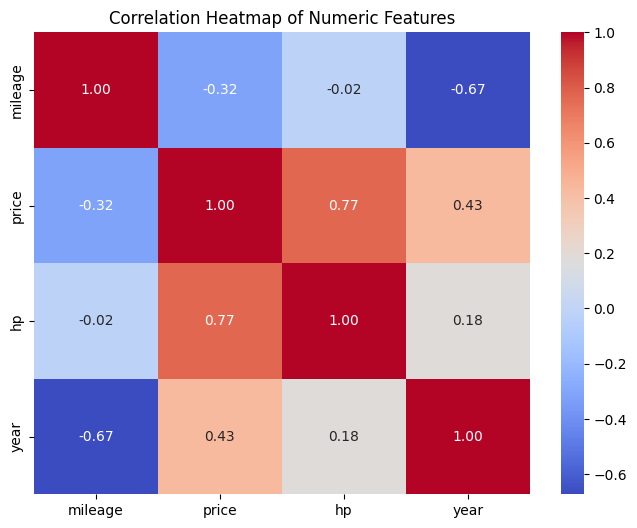

In [81]:
#Correlation graph to show correlation between the different numeric features
numeric_df = df[['mileage', 'price', 'hp', 'year']].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


The correlation graph shows that price and year has a moderate positive correlation with 0.43. This means that the year is a relatively good predictor of the car price. Price and horsepower has a strong positive correlation of 0.77. This means that horsepower is a good predictor of car price. Lastly, price and mileage has a negative correlation with -0.32. This means that mileage is a relatively good predictor of the car price. In conclusion, year, horsepower, and mileage are useful in predicting the car price.

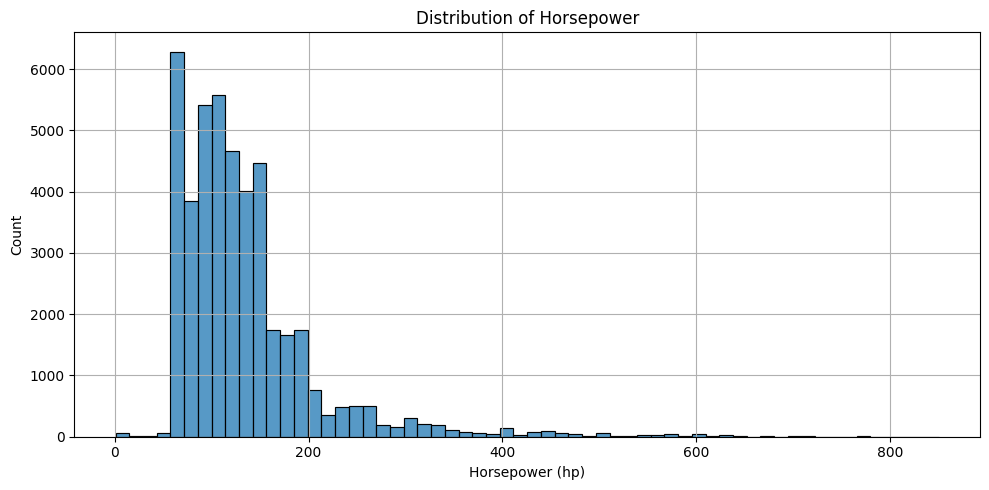

In [106]:
#Check horsepower distribution
plt.figure(figsize=(10,5))
sns.histplot(df['hp'].dropna(), bins=60)
plt.title("Distribution of Horsepower")
plt.xlabel("Horsepower (hp)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

This graph shows that the distribution of horsepower is very skewed, so it is better to use mode to replace the missing values instead of mean.

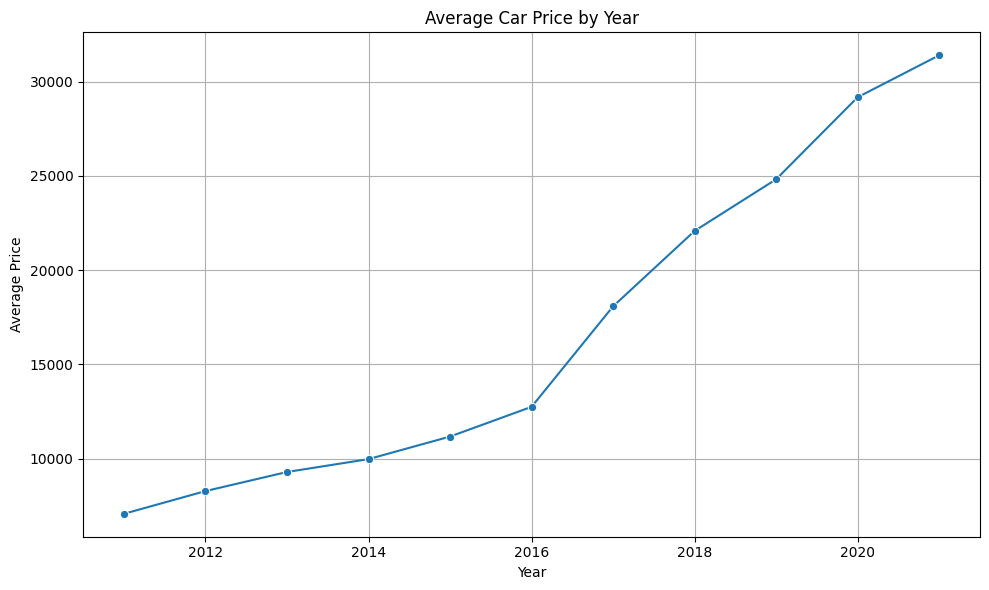

In [82]:
#Graph to show the average car price based on the year
avg_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_by_year, x='year', y='price', marker='o')

plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()

This graph shows that as the year increases, the average car price also increases, so when trying to predict the car price, if the year is more recent, the car price will be more expensive

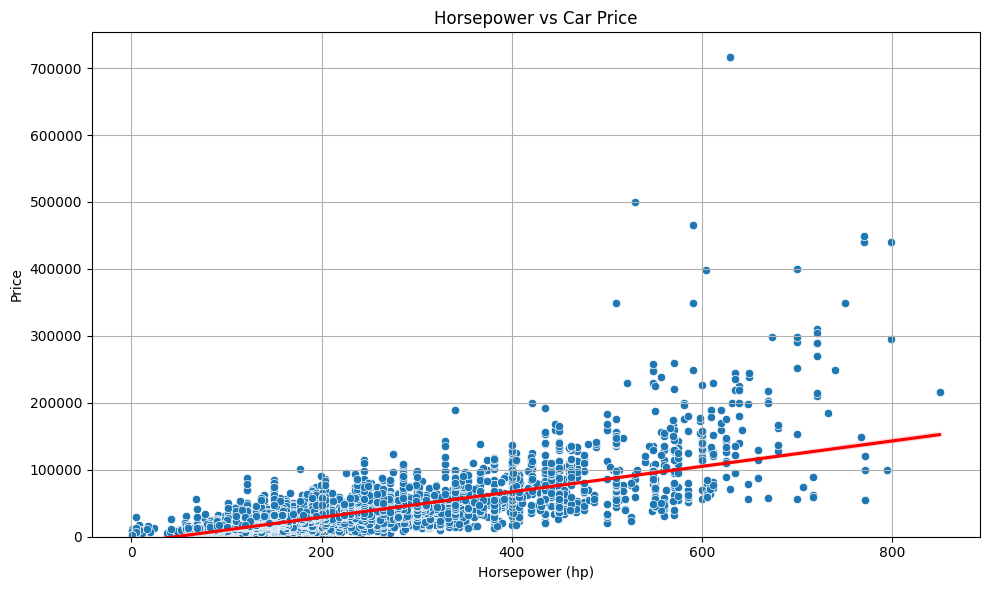

In [102]:
#Scatterplot to show the distribution of car price based on the horsepower
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='hp', y='price')
sns.regplot(data=df, x='hp', y='price', scatter=False, color='red')
plt.title('Horsepower vs Car Price')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Price')
plt.ylim(0)
plt.grid(True)
plt.tight_layout()
plt.show()


This graph shows that as the horsepower increases, the car price also increases, so when trying to predict car price, if the horsepower is higher, the car price should be higher.

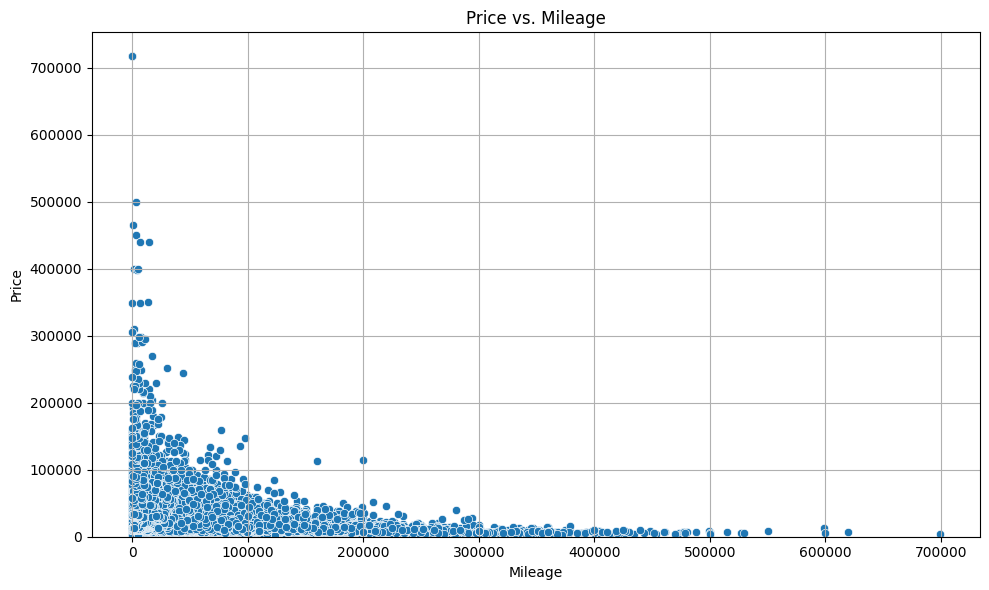

In [100]:
#Scatter plot to show the distribution of the car price and mileage
plt.figure(figsize=(10, 6))

sns.scatterplot(x='mileage', y='price', data=df)

plt.ylim(0)

plt.title("Price vs. Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()




This graph shows that price and mileage has an inverse relationship. As the mileage increases, the price will decrease, so when trying to predict car prices, if the mileage is higher, the car price would decrease.

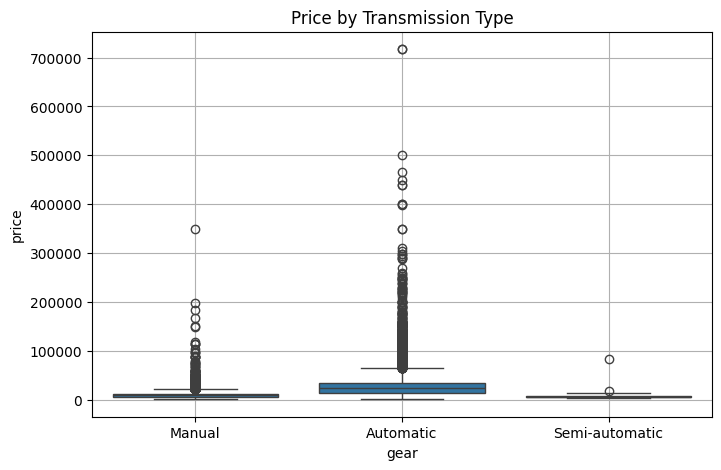

In [85]:
#Graph to show distribution of transmission type and the price
plt.figure(figsize=(8, 5))
sns.boxplot(x='gear', y='price', data=df)
plt.title("Price by Transmission Type")
plt.grid(True)
plt.show()


This graph shows that Manual has a lower median and a tighter IQR, with far fewer extreme prices. Automatic has the highest median price and the widest spread. It also contains most of the very high‑price outliers. Semi‑automatic has the lowest median and very few outliers. This shows that Automatic generally has a higher car price, followed by manual, followed by semi-automatic.

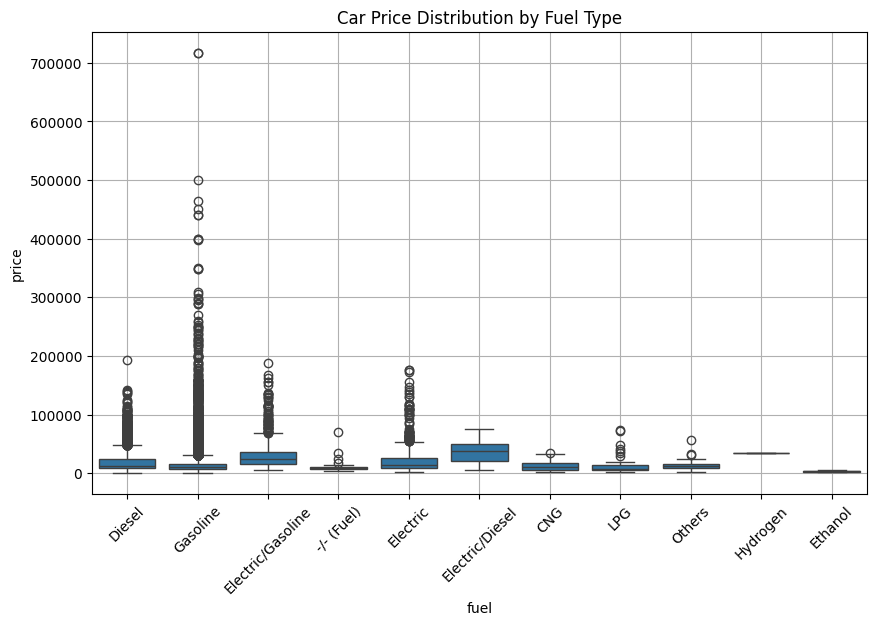

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Fuel Type")
plt.grid(True)
plt.show()


This graph shows that Gasoline has the most samples and shows the widest spread and many high outliers. Diesel has a slightly lower median and a more narrow IQR than gasoline and is more concentrated around mid‑range prices. Electric/Diesel and Electric/Gasoline hybrids show higher medians than many other fuels, with Electric/Gasoline having many outlier values. Electric has a relatively high median too with many outliers. -/-(Fuel), CNG, LPG, “Others” sit lower on median and spread. Hydrogen/Ethanol appear with very few observations.

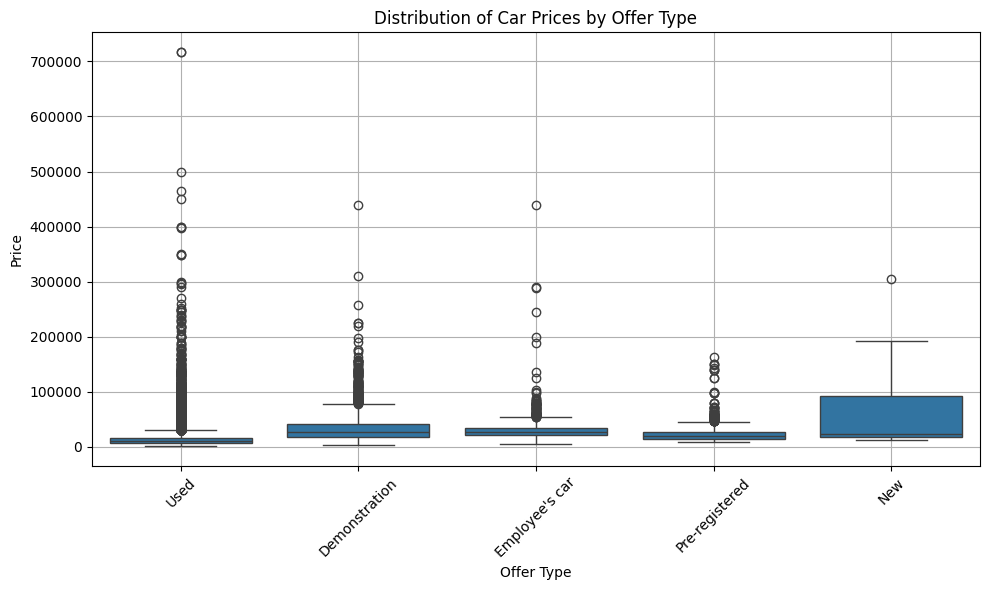

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='offerType', y='price')
plt.title('Distribution of Car Prices by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

From this graph, it can be seen that New cars are the most expensive as the median is the highest. The IQR is also widest, meaning new car prices vary a lot. Used cars are the cheapest on average as they have the lowest median and a tight IQR. However, they contain a lot of outliers. Pre‑registered, Demonstration, and Employee’s car are between Used and New. These categories typically represent almost‑new vehicles, so their medians are below New but above Used.

In [88]:
#Perform One-Hot Encoding to the dataset
df_encoded=pd.get_dummies(df, drop_first=True)

In [89]:
#Split the data set to train and test sets
from sklearn.model_selection import train_test_split 

X = df_encoded.drop(columns=["price"])
y = df_encoded["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [90]:
#Testing performance of different models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor

etr_model = ExtraTreesRegressor(random_state=8)
etr_model.fit(X_train, y_train)

etr_pred = etr_model.predict(X_test)

etr_mae = mean_absolute_error(y_test, etr_pred)
etr_mse = mean_squared_error(y_test, etr_pred)
etr_r2 = r2_score(y_test, etr_pred)

print("Extra Trees Regression")
print("MAE:", round(etr_mae, 2))
print("MSE:", round(etr_mse, 2))
print("R2:", round(etr_r2, 2))


Extra Trees Regression
MAE: 1919.94
MSE: 56164838.13
R2: 0.85


After testing out a few models, Extra Trees Regressor was the model with the best performance, so I decided to proceed with this model. The other models that were tested are included in the appendix. When testing the performance of the models, I chose MAE, MSE, and R2. For MAE, it makes it easy to interpret the error in the same units as the price. For MSE, it will help to identify if the model makes very large mistakes. For R2, it makes it easy to compare different models quickly and see how well the model fits the data. 

In [91]:
#Dropping features of low importance
importances = pd.Series(etr_model.feature_importances_, index=X.columns)
low_importance_features = importances[importances < 0.001].index
print(list(low_importance_features))
X_reduced = X.drop(columns=low_importance_features)





['make_Abarth', 'make_Aixam', 'make_Alfa', 'make_Alpina', 'make_Alpine', 'make_Baic', 'make_Brilliance', 'make_Cadillac', 'make_Caravans-Wohnm', 'make_Chevrolet', 'make_Chrysler', 'make_Citroen', 'make_Corvette', 'make_Cupra', 'make_DAF', 'make_DFSK', 'make_DS', 'make_Dacia', 'make_Daihatsu', 'make_Estrima', 'make_FISKER', 'make_Fiat', 'make_Honda', 'make_Hyundai', 'make_Infiniti', 'make_Isuzu', 'make_Iveco', 'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Lada', 'make_Lancia', 'make_Lexus', 'make_Ligier', 'make_MINI', 'make_Maserati', 'make_Mazda', 'make_Microcar', 'make_Mitsubishi', 'make_Morgan', 'make_Nissan', 'make_Opel', 'make_Others', 'make_Peugeot', 'make_Piaggio', 'make_Polestar', 'make_RAM', 'make_Renault', 'make_Rolls-Royce', 'make_SEAT', 'make_Skoda', 'make_SsangYong', 'make_Subaru', 'make_Suzuki', 'make_Tazzari', 'make_Tesla', 'make_Toyota', 'make_Trailer-Anhänger', 'make_Trucks-Lkw', 'make_Volvo', 'make_Zhidou', 'make_smart', 'model_108', 'model_114', 'model_116', 'model_11

After choosing the Extra Trees Regressor model, I dropped the low importance features to reduce overfitting and improve training and prediction speed.

In [92]:
#Testing performance of ETR model after dropping low importance features
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=8)
new_etr_model = ExtraTreesRegressor(random_state=8)
new_etr_model.fit(X_train_reduced, y_train)

new_etr_pred = new_etr_model.predict(X_test_reduced)

new_etr_mae = mean_absolute_error(y_test, new_etr_pred)
new_etr_mse = mean_squared_error(y_test, new_etr_pred)
new_etr_r2 = r2_score(y_test, new_etr_pred)

print("New Extra Trees Regression")
print("MAE:", round(new_etr_mae, 2))
print("MSE:", round(new_etr_mse, 2))
print("R2:", round(new_etr_r2, 2))




New Extra Trees Regression
MAE: 2377.58
MSE: 63156700.66
R2: 0.83


After dropping the low importance features, the MAE, MSE, and R2 is 2377.58, 63156700.66, and 0.83 respectively.

In [93]:
#Perform Hyperparameter tuning by using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],        
    'max_depth': [None, 10, 20, 25, 30, 35],       
    'min_samples_split': [2, 5, 10, 20, 25],   
    'min_samples_leaf': [1, 2, 5, 10, 20, 25],     
}

grid_search = GridSearchCV(estimator=ExtraTreesRegressor(random_state=8), param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')


grid_search.fit(X_train_reduced, y_train)

print("Best Parameters:", grid_search.best_params_)

best_etr_model = grid_search.best_estimator_
best_pred = best_etr_model.predict(X_test_reduced)

mae = mean_absolute_error(y_test, best_pred)
mse = mean_squared_error(y_test, best_pred)
r2 = r2_score(y_test, best_pred)

print("Tuned Extra Trees Regression")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("R2:", round(r2, 2))



Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Tuned Extra Trees Regression
MAE: 2172.26
MSE: 59071883.48
R2: 0.84


For hyperparameter tuning, I used both GridSearchCV and RandomizedSearchCV, but ended up using GridSearchCV, as it is able to find the best parameters in the grid, whereas in RandomizedSearchCV, there is no guarantee finding the best combination. After carrying out hyperparameter tuning, the MAE, MSE, and R2 has improved to 2172.26, 59071883.48 and 0.84 respectively.

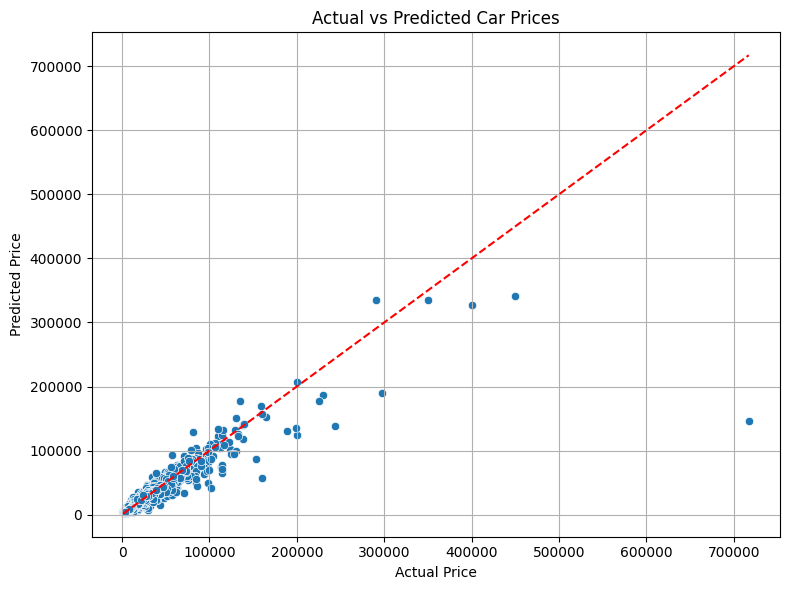

In [94]:
#Graph to show the performance of the model
y_pred = best_etr_model.predict(X_test_reduced)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


For this graph, if the predicted price and the actual price are aligned, the plots would be on the red line. From this graph, it shows that the model does a relatively good job on predicting the lower car prices. However, the accuracy of the predicted car price does decrease as the actual car price increases. There is also one outlier, where the model predicted the car price as around 150,000 when the actual car price is around 720,000.

In [95]:
#Seeing the fit of the model
train_preds = best_etr_model.predict(X_train_reduced)
test_preds = best_etr_model.predict(X_test_reduced)

train_r2 = r2_score(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)

test_r2 = r2_score(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)

print("Training R2:", round(train_r2, 2))
print("Training MAE:", round(train_mae, 2))
print("Testing R2:", round(test_r2, 2))
print("Testing MAE:", round(test_mae, 2))

Training R2: 0.98
Training MAE: 1325.96
Testing R2: 0.84
Testing MAE: 2172.26


Based on the results, the model demonstrates a strong fit, as shown by its high R² scores and low mean absolute errors. A training R² of 0.98 indicates that the model explains nearly all of the variance in the training data, while the testing R² of 0.84 shows it generalizes well to unseen data. The low MAE of 1,326 on training and 2,172 on testing are small relative to the overall price range of the cars, meaning the model’s average prediction error would be minor.

In [103]:
import joblib
joblib.dump(best_etr_model, 'model.pkl')

['model.pkl']

## APPENDIX

## Outlier values

plt.figure(figsize=(10, 6))

sns.scatterplot(x='mileage', y='price', data=df)

plt.ylim(0)

plt.title("Price vs. Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

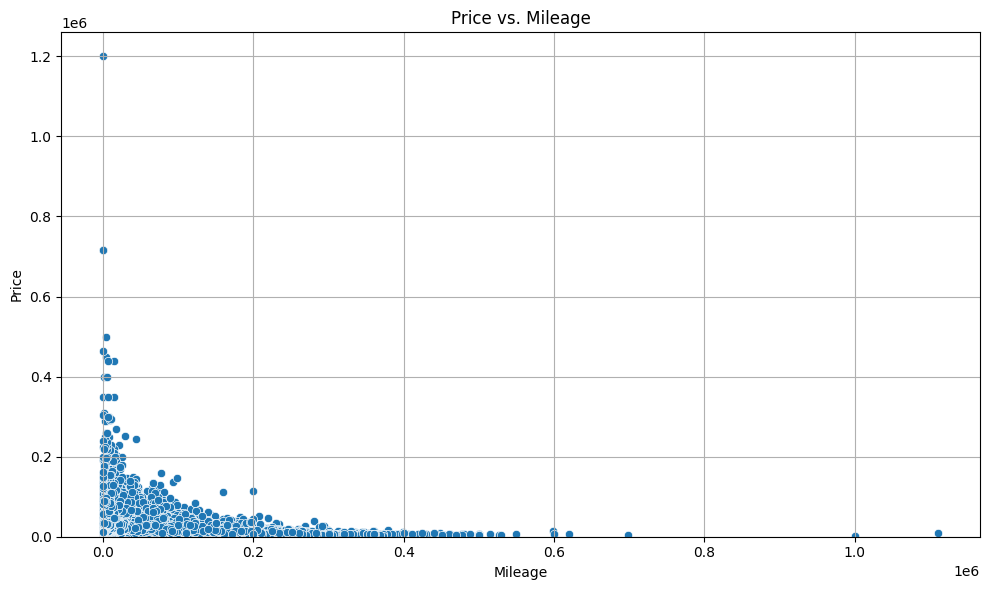

Graph showing outlier price ($1.2 Million) and mileage (1 million miles and above)

## Other tested models

### LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)


lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression")
print("MAE:", round(lr_mae, 2))
print("MSE:", round(lr_mse, 2))
print("R2:", round(lr_r2, 2))

Linear Regression
MAE: 5229824.05
MSE: 1.4663365707195916e+16
R2: -39294749.76

### DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state=8)
dtr_model.fit(X_train, y_train)

dtr_pred = dtr_model.predict(X_test)

dtr_mae = mean_absolute_error(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_r2 = r2_score(y_test, dtr_pred)

print("Decision Tree Regression")
print("MAE:", round(dtr_mae, 2))
print("MSE:", round(dtr_mse, 2))
print("R2:", round(dtr_r2, 2))

Decision Tree Regression
MAE: 2506.46
MSE: 80916385.85
R2: 0.78

### RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=8)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest")
print("MAE:", round(rf_mae, 2))
print("MSE:", round(rf_mse, 2))
print("R2:", round(rf_r2, 2))

Random Forest
MAE: 1953.0
MSE: 57902624.59
R2: 0.84

## Hyperparameter tuning using RandomizedSearch

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400],        
    'max_depth': [None, 10, 20, 25, 30, 35],       
    'min_samples_split': [2, 5, 10, 20, 25],   
    'min_samples_leaf': [1, 2, 5, 10, 20, 25], 
}

random_search = RandomizedSearchCV(
    estimator=ExtraTreesRegressor(random_state=8),
    param_distributions=param_dist,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
)

random_search.fit(X_train_reduced, y_train)

print("Parameters:", random_search.best_params_)

best_etr_model = random_search.best_estimator_
best_pred = best_etr_model.predict(X_test_reduced)

mae = mean_absolute_error(y_test, best_pred)
mse = mean_squared_error(y_test, best_pred)
r2 = r2_score(y_test, best_pred)

print("Tuned Extra Trees Regression (RandomizedSearch)")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("R2:", round(r2, 2))

Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Tuned Extra Trees Regression (RandomizedSearch)
MAE: 2221.13
MSE: 59411556.13
R2: 0.84